Comparison of World Model and Real Env

Use MSE
MSE of 0 perfect similarity,

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/WorldModelsExperiments/dashboarddash/obsfordiff.pkl', 'rb')
obs = pickle.load(pkl_obs_file)

In [3]:
obs.shape

(10, 132, 240, 3)

In [57]:
obs_real = []
obs_sim = []
obs_diff = []
for ob in obs:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs_sim.append(ob_sim)
    obs_real.append(ob_real)
    obs_diff.append(ob_diff)

In [31]:
def calc_mse(img1, img2):
    err = np.sum((img1.astype('float') - img2.astype('float'))**2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

In [34]:
mse = []
for i in range(len(obs_sim)):
    mse.append(calc_mse(obs_sim[i], obs_real[i]))

0
1
2
3
4


In [ ]:
plt.plot(mse)
plt.show()

10

In [58]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [59]:
mse_error = []
ssim_error = []
for i in range(len(obs_sim)):
    mse_error.append(mean_squared_error(obs_sim[i], obs_real[i]))
    ssim_error.append(ssim(obs_sim[i], obs_real[i], dynamic_range=obs_real[i].max()-obs_real[i].min(), multichannel=True))

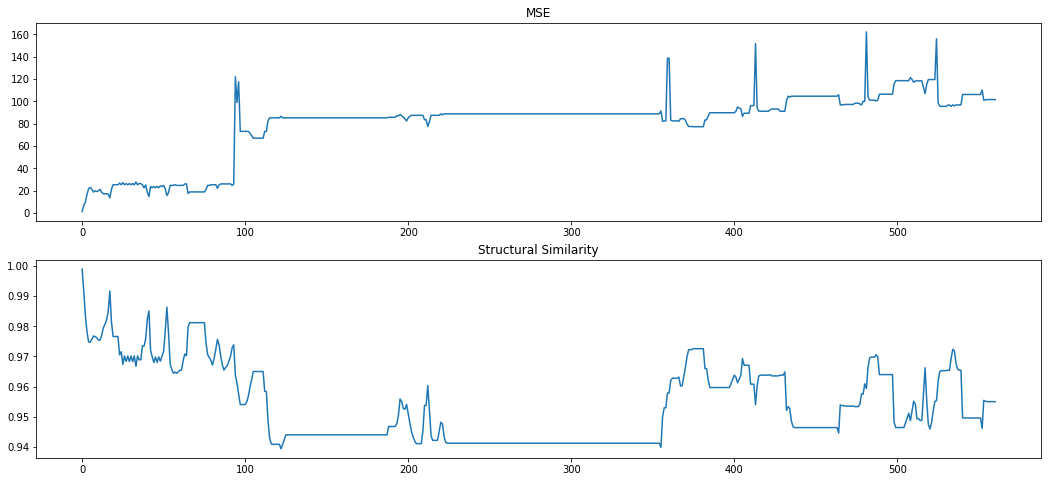

In [64]:
plt.subplots(2,1, figsize=(18,8))
plt.subplot(2,1,1)
plt.title('MSE')
plt.plot(mse_error)
plt.subplot(2,1,2)
plt.title('Structural Similarity')
plt.plot(ssim_error)
plt.show()

Look at first images - ball appears in differen

In [6]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff3.pkl', 'rb')
obs1 = pickle.load(pkl_obs_file)

In [7]:
obs1.shape

(50, 132, 240, 3)

In [8]:
obs1_real = []
obs1_sim = []
obs1_diff = []
for ob in obs1:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs1_sim.append(ob_sim)
    obs1_real.append(ob_real)
    obs1_diff.append(ob_diff)

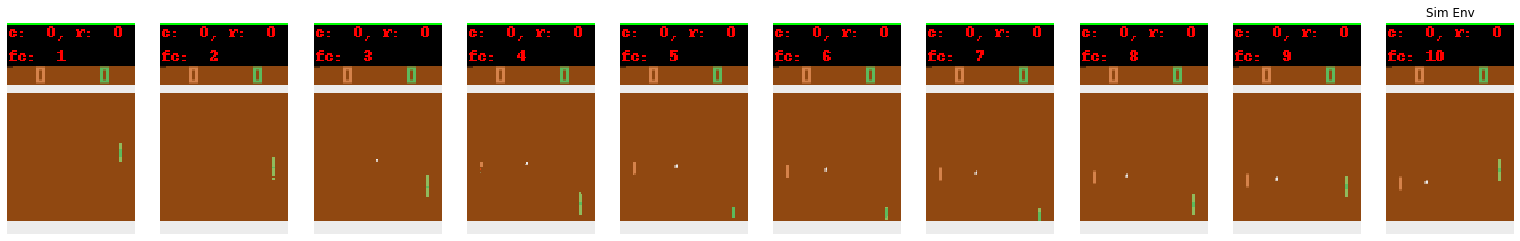

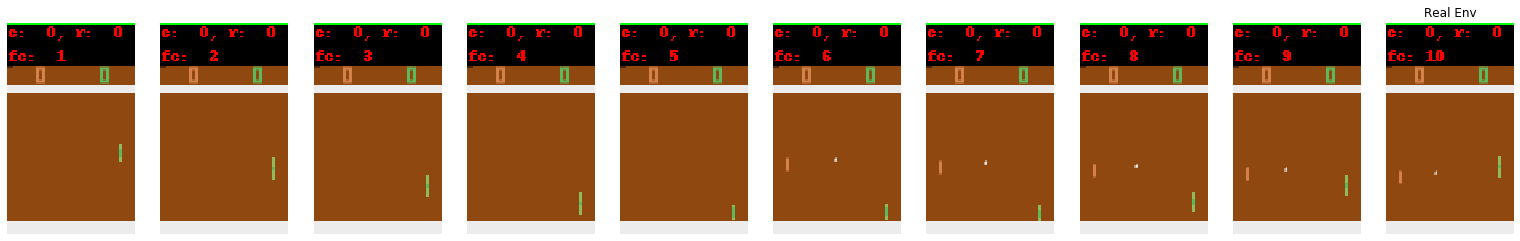

In [36]:
plt.subplots(1,10, figsize=(27,10))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.imshow(obs1_sim[i])
    plt.axis('off')
plt.title('Sim Env')
plt.show()
plt.subplots(1,10, figsize=(27,10))
index=1
for i in range(10):
    plt.subplot(1,10,(index))
    index+=1
    plt.imshow(obs1_real[i])
    plt.axis('off')
plt.title('Real Env')
plt.show()

In [38]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff1.pkl', 'rb') # mit sim_env.step repeat 4 times as in maxandskip
obs1 = pickle.load(pkl_obs_file)

In [39]:
obs1_real = []
obs1_sim = []
obs1_diff = []
for ob in obs1:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs1_sim.append(ob_sim)
    obs1_real.append(ob_real)
    obs1_diff.append(ob_diff)

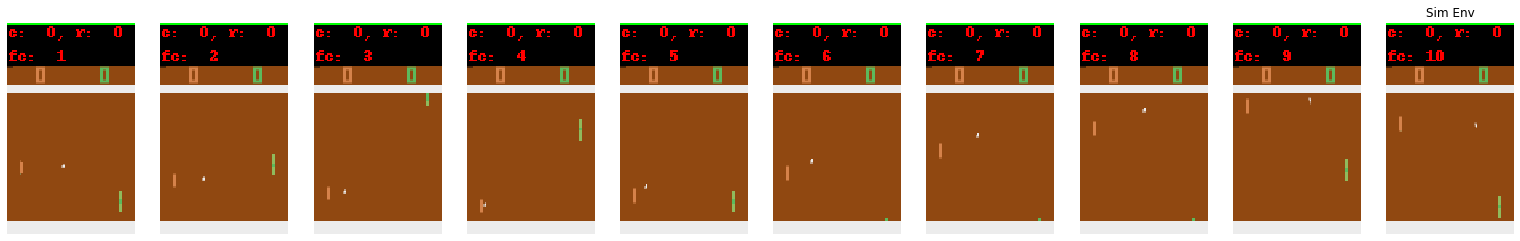

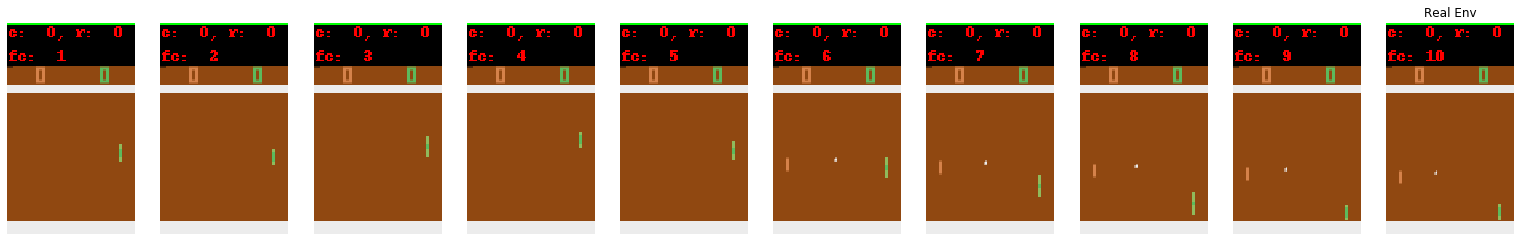

In [40]:
plt.subplots(1,10, figsize=(27,10))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.imshow(obs1_sim[i])
    plt.axis('off')
plt.title('Sim Env')
plt.show()
plt.subplots(1,10, figsize=(27,10))
index=1
for i in range(10):
    plt.subplot(1,10,(index))
    index+=1
    plt.imshow(obs1_real[i])
    plt.axis('off')
plt.title('Real Env')
plt.show()

In [41]:
import gym

In [42]:
env = gym.make('Pong-v0')

In [43]:
env.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

### remove header of images, shape:80x27

#### img.shape = 80x27  , ob.shape = 105x80x3  , header.shape = 27x80x3  , ob_aug.shape=132,80,3

### Only look at diff image: count pixels that are different from black

In [44]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff1.pkl', 'rb')
obs1 = pickle.load(pkl_obs_file)

In [45]:
obs1_real = []
obs1_sim = []
obs1_diff = []
for ob in obs1:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs1_sim.append(ob_sim)
    obs1_real.append(ob_real)
    obs1_diff.append(ob_diff)

In [64]:
for i in range(len(obs1_diff)):
    obs1_diff[i] = obs1_diff[i][27:,:,:]

In [71]:
diff_zero = []
for i in range(len(obs1_diff)):
    diff_zero.append(np.count_nonzero(obs1_diff[i]))

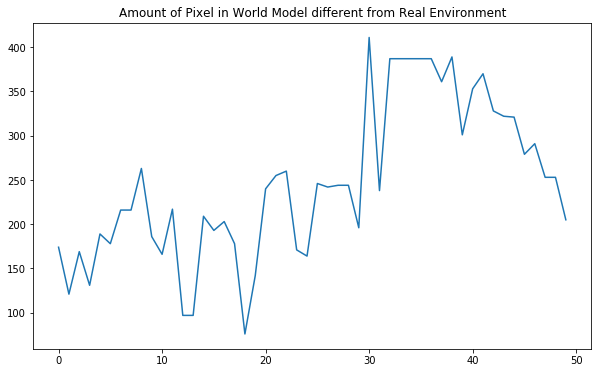

In [77]:
plt.figure(figsize=(10,6))
plt.plot(diff_zero)
plt.title('Amount of Pixel in World Model different from Real Environment')
plt.show()

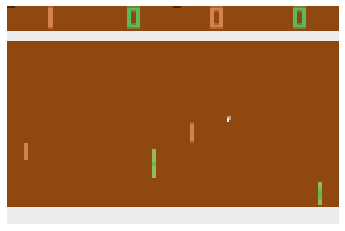

In [93]:
max_index = np.argmax(diff_zero)
plt.imshow(np.concatenate([obs1_sim[max_index][27:,:,:], obs1_real[max_index][27:,:,:]], axis=1))
plt.axis('off')
plt.show()

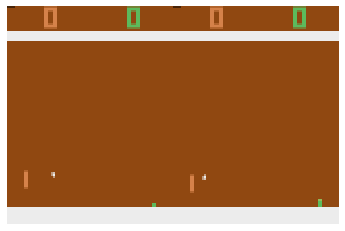

In [94]:
min_index = np.argmin(diff_zero)
plt.imshow(np.concatenate([obs1_sim[min_index][27:,:,:], obs1_real[min_index][27:,:,:]], axis=1))
plt.axis('off')
plt.show()

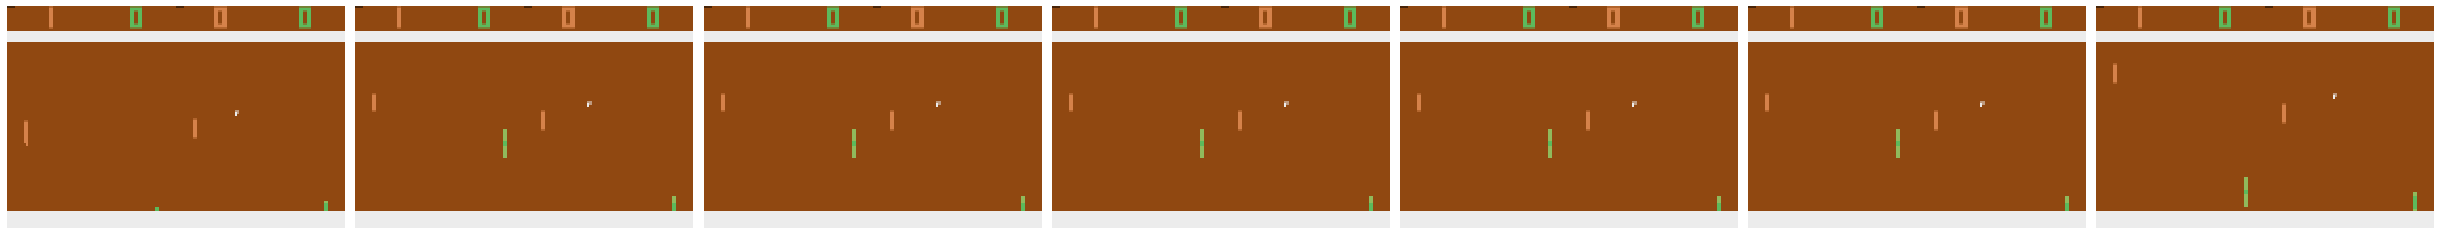

In [112]:
plt.subplots(1,7, figsize=(34,12))
index=1
for i in range(31,38):
    plt.subplot(1,7,(index))
    index+=1
    plt.imshow(np.concatenate([obs1_sim[i][27:,:,:], obs1_real[i][27:,:,:]], axis=1))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [113]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff2.pkl', 'rb')
obs1 = pickle.load(pkl_obs_file)

In [114]:
obs1_real = []
obs1_sim = []
obs1_diff = []
for ob in obs1:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs1_sim.append(ob_sim)
    obs1_real.append(ob_real)
    obs1_diff.append(ob_diff)

In [115]:
for i in range(len(obs1_diff)):
    obs1_diff[i] = obs1_diff[i][27:,:,:]

In [116]:
diff_zero = []
for i in range(len(obs1_diff)):
    diff_zero.append(np.count_nonzero(obs1_diff[i]))

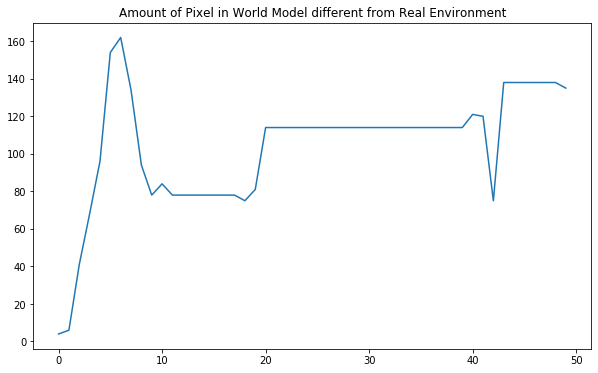

In [117]:
plt.figure(figsize=(10,6))
plt.plot(diff_zero)
plt.title('Amount of Pixel in World Model different from Real Environment')
plt.show()

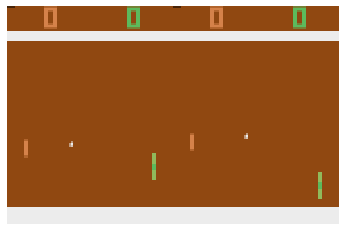

In [118]:
max_index = np.argmax(diff_zero)
plt.imshow(np.concatenate([obs1_sim[max_index][27:,:,:], obs1_real[max_index][27:,:,:]], axis=1))
plt.axis('off')
plt.show()

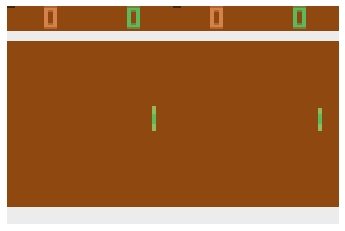

In [119]:
min_index = np.argmin(diff_zero)
plt.imshow(np.concatenate([obs1_sim[min_index][27:,:,:], obs1_real[min_index][27:,:,:]], axis=1))
plt.axis('off')
plt.show()

In [121]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff3.pkl', 'rb')
obs3 = pickle.load(pkl_obs_file)

In [122]:
obs3.shape

(50, 132, 240, 3)

In [123]:
obs3_real = []
obs3_sim = []
obs3_diff = []
for ob in obs3:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs3_sim.append(ob_sim)
    obs3_real.append(ob_real)
    obs3_diff.append(ob_diff)

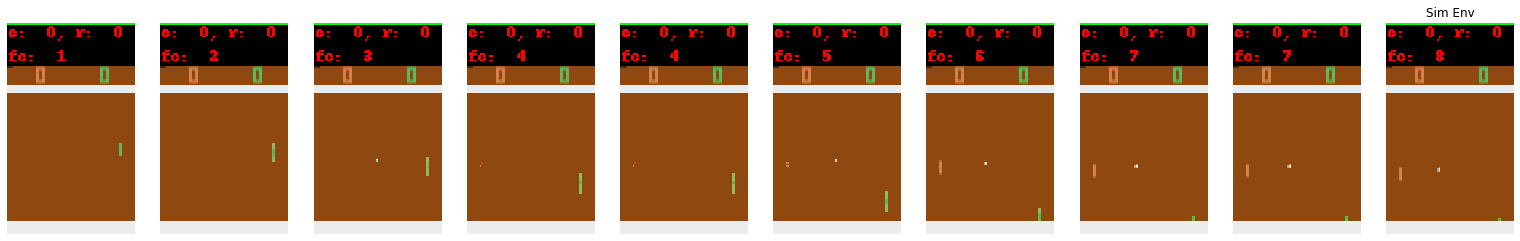

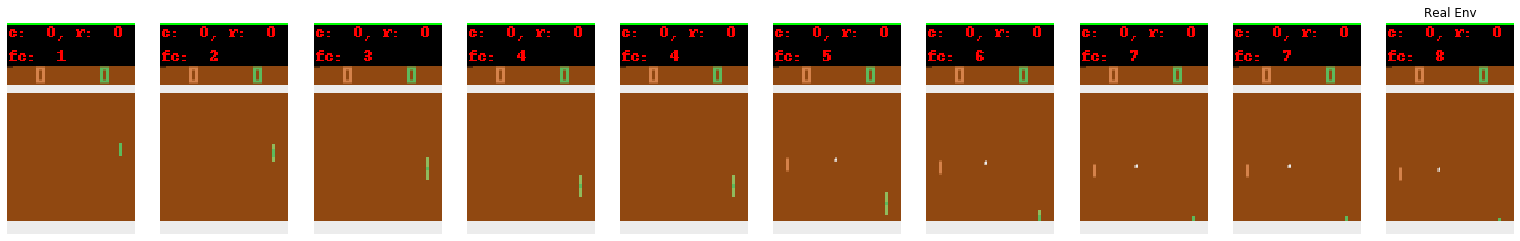

In [124]:
plt.subplots(1,10, figsize=(27,10))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.imshow(obs3_sim[i])
    plt.axis('off')
plt.title('Sim Env')
plt.show()
plt.subplots(1,10, figsize=(27,10))
index=1
for i in range(10):
    plt.subplot(1,10,(index))
    index+=1
    plt.imshow(obs3_real[i])
    plt.axis('off')
plt.title('Real Env')
plt.show()

In [129]:
for i in range(len(obs3_diff)):
    obs3_diff[i] = obs3_diff[i][27:,:,:]

In [130]:
diff3_zero = []
for i in range(len(obs3_diff)):
    diff3_zero.append(np.count_nonzero(obs3_diff[i]))

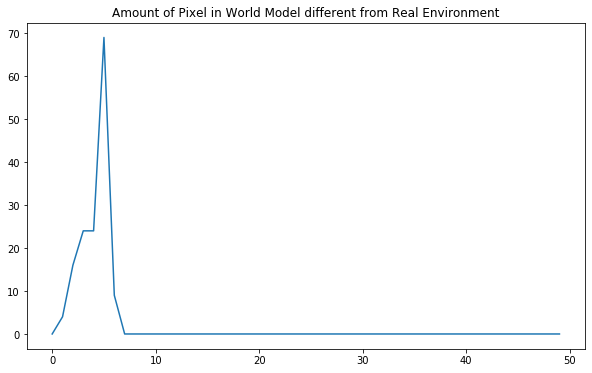

In [131]:
plt.figure(figsize=(10,6))
plt.plot(diff3_zero)
plt.title('Amount of Pixel in World Model different from Real Environment')
plt.show()

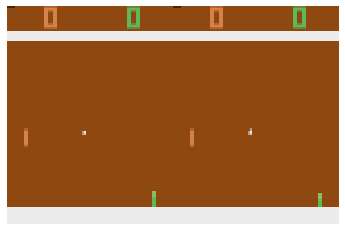

In [299]:
max_index = np.argmax(diff_zero)
plt.imshow(np.concatenate([obs3_sim[max_index][27:,:,:], obs3_real[max_index][27:,:,:]], axis=1))
plt.axis('off')
plt.savefig('test.png')
plt.show()

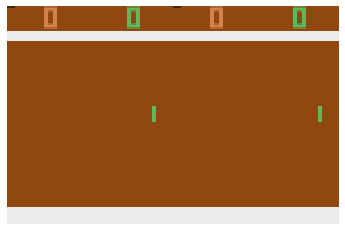

In [136]:
min_index = np.argmin(diff_zero)
plt.imshow(np.concatenate([obs3_sim[min_index][27:,:,:], obs3_real[min_index][27:,:,:]], axis=1))
plt.axis('off')
plt.show()

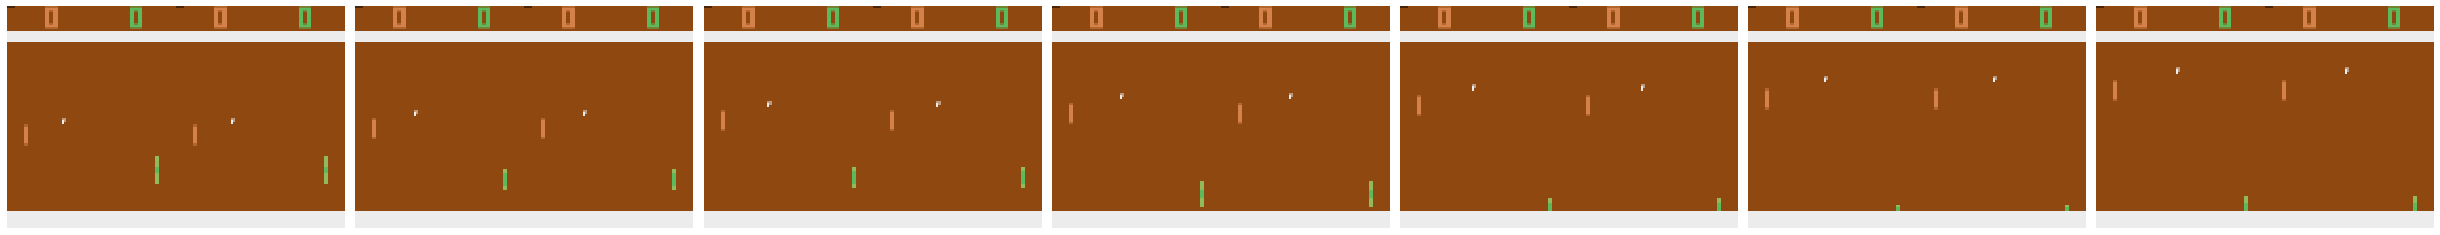

In [137]:
plt.subplots(1,7, figsize=(34,12))
index=1
for i in range(31,38):
    plt.subplot(1,7,(index))
    index+=1
    plt.imshow(np.concatenate([obs3_sim[i][27:,:,:], obs3_real[i][27:,:,:]], axis=1))
    plt.axis('off')
plt.tight_layout()
plt.show()

### Durchschnitt an aneinanderhängenden Reihen bei denen Differenz Null ist

In [180]:
list1=[1,2,3,0,0,0,5,5,0,1,9,1,1]
list2=[0,0,4,1,9,9,9,8]

In [181]:
#index0=[i for i, e in enumerate(list1) if i==0]
index0=[]
for i in range(len(list1)-1):
    if (list1[i]) == list1[i+1]:
        index0.append(i)
index0   
# AUFPASSEN: zwei aufeinanderfolgende indexe heißen, dass 3(!!!) zahlen gleich sind

[3, 4, 6, 11]

In [187]:
index0_counter = 1
index0_counter_list=[]
for i in range(len(index0)-1):
    print(i)
    if (index0[i]+1) == index0[i+1]:
        print('Equal: ', index0[i], index0[i+1])
        index0_counter+=1
        print('Counter: ', index0_counter)
    else:
        print('Reset Counter')
        index0_counter_list.append(index0_counter+1)
        index0_counter=1
index0_counter_list.append(index0_counter+1)
index0_counter_list

0
Equal:  3 4
Counter:  2
1
Reset Counter
2
Reset Counter


[3, 2, 2]

In [169]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff_total.pkl', 'rb')
obs5total = pickle.load(pkl_obs_file)

In [170]:
obs5total_real = []
obs5total_sim = []
obs5total_diff = []
for game in obs5total:
    for ob in game:
        ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
        obs5total_sim.append(ob_sim)
        obs5total_real.append(ob_real)
        obs5total_diff.append(ob_diff)

In [172]:
for i in range(len(obs5total_diff)):
    obs5total_diff[i] = obs5total_diff[i][27:,:,:]

In [173]:
diff5total_zero = []
for i in range(len(obs5total_diff)):
    diff5total_zero.append(np.count_nonzero(obs5total_diff[i]))

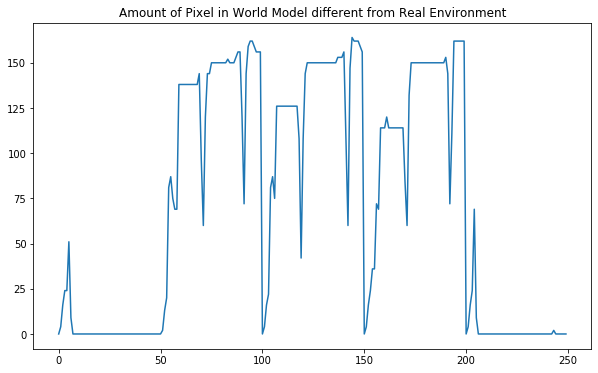

In [174]:
plt.figure(figsize=(10,6))
plt.plot(diff5total_zero)
plt.title('Amount of Pixel in World Model different from Real Environment')
plt.show()

In [189]:
indexequal_5total=[]
for i in range(len(diff5total_zero)-1):
    if (diff5total_zero[i]) == diff5total_zero[i+1]:
        indexequal_5total.append(i)
# AUFPASSEN: zwei aufeinanderfolgende indexe heißen, dass 3(!!!) zahlen gleich sind

In [190]:
indexequal_5total_counter = 1
indexequal_5total_counter_list=[]
for i in range(len(indexequal_5total)-1):
    #print(i)
    if (indexequal_5total[i]+1) == indexequal_5total[i+1]:
        #print('Equal: ', index0[i], index0[i+1])
        indexequal_5total_counter+=1
        #print('Counter: ', index0_counter)
    else:
        #print('Reset Counter')
        indexequal_5total_counter_list.append(indexequal_5total_counter+1)
        indexequal_5total_counter=1
indexequal_5total_counter_list.append(indexequal_5total_counter+1)
indexequal_5total_counter_list

[2, 44, 2, 10, 2, 8, 3, 2, 2, 3, 11, 15, 3, 3, 2, 3, 8, 17, 6, 37, 6]

In [196]:
import statistics
print('Mean: ', statistics.mean(indexequal_5total_counter_list))
print('Max: ', max(indexequal_5total_counter_list))

Mean:  9
Max:  44


In [279]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/tensor2tensor/tensor2tensor/rl/obsfordiff_total300.pkl', 'rb')
obs300total = pickle.load(pkl_obs_file)

In [280]:
obs300total_real = []
obs300total_sim = []
obs300total_diff = []
for game in obs300total:
    for ob in game:
        ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
        obs300total_sim.append(ob_sim)
        obs300total_real.append(ob_real)
        obs300total_diff.append(ob_diff)

In [281]:
for i in range(len(obs300total_diff)):
    obs300total_diff[i] = obs300total_diff[i][27:,:,:]

In [282]:
diff300total_zero = []
for i in range(len(obs300total_diff)):
    diff300total_zero.append(np.count_nonzero(obs300total_diff[i]))

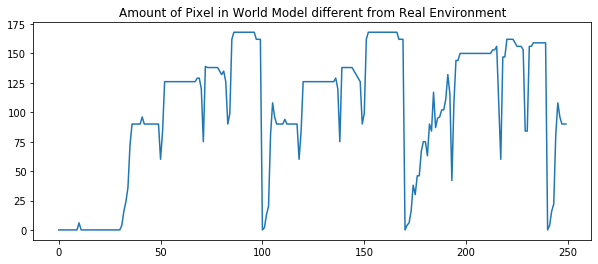

In [298]:
plt.figure(figsize=(10,4))
plt.plot(diff300total_zero[250:500])
plt.title('Amount of Pixel in World Model different from Real Environment')
plt.savefig('pixel_difference1000.png')
plt.show()

In [204]:
indexequal_300total=[]
for i in range(len(diff300total_zero)-1):
    if (diff300total_zero[i]) == diff300total_zero[i+1]:
        indexequal_300total.append(i)
# AUFPASSEN: zwei aufeinanderfolgende indexe heißen, dass 3(!!!) zahlen gleich sind

In [ ]:
indexequal_300total_counter = 1
indexequal_300total_counter_list=[]
for i in range(len(indexequal_300total)-1):
    #print(i)
    if (indexequal_300total[i]+1) == indexequal_300total[i+1]:
        #print('Equal: ', index0[i], index0[i+1])
        indexequal_300total_counter+=1
        #print('Counter: ', index0_counter)
    else:
        #print('Reset Counter')
        indexequal_300total_counter_list.append(indexequal_300total_counter+1)
        indexequal_300total_counter=1
indexequal_300total_counter_list.append(indexequal_300total_counter+1)
indexequal_300total_counter_list

In [211]:
import statistics
print('Iterations: ', len(diff300total_zero))
print('Mean: ', statistics.mean(indexequal_300total_counter_list))
print('Max: ', max(indexequal_300total_counter_list))

Iterations:  21000
Mean:  6.713513513513513
Max:  65


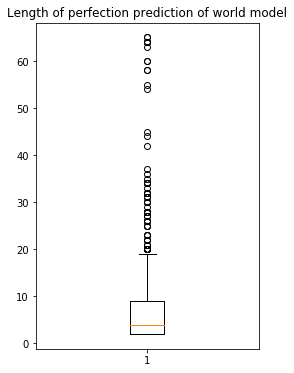

In [247]:
plt.figure(figsize=(4,6))
plt.boxplot(indexequal_300total_counter_list)
plt.title('Length of perfection prediction of world model')
plt.savefig('Boxplot_perfectprediction.png')
plt.show()

In [283]:
index0_300total =[i for i, e in enumerate(diff300total_zero) if e==0]

In [284]:
index0_300total_counter = 1
index0_300total_counter_list=[]
for i in range(len(index0_300total)-1):
    #print(i)
    if (index0_300total[i]+1) == index0_300total[i+1]:
        #print('Equal: ', index0[i], index0[i+1])
        index0_300total_counter+=1
        #print('Counter: ', index0_counter)
    else:
        #print('Reset Counter')
        index0_300total_counter_list.append(index0_300total_counter+1)
        index0_300total_counter=1
index0_300total_counter_list.append(index0_300total_counter+1)


In [285]:
import statistics
print('Iterations: ', len(diff300total_zero))
print('Mean: ', statistics.mean(index0_300total_counter_list))
print('Median: ', statistics.median(index0_300total_counter_list))
print('Max: ', max(index0_300total_counter_list))
print('25 % quantil: ', np.quantile(np.array(index0_300total_counter_list), 0.25))
print('75 % quantil: ', np.quantile(np.array(index0_300total_counter_list), 0.75))

Iterations:  21000
Mean:  8.58529411764706
Median:  2.0
Max:  66
25 % quantil:  2.0
75 % quantil:  2.0


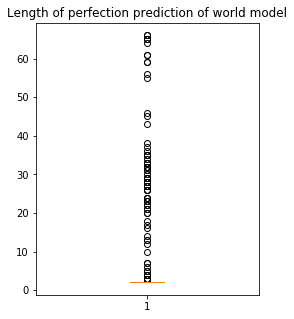

In [296]:
plt.figure(figsize=(4,5))
plt.boxplot(index0_300total_counter_list)
plt.title('Length of perfection prediction of world model')
plt.savefig('Boxplot_perfectprediction.png')
plt.show()

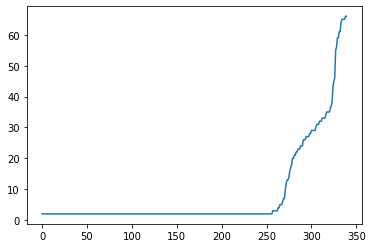

In [295]:
plt.plot(sorted(index0_300total_counter_list))
plt.show()

In [4]:
len(obs)

60

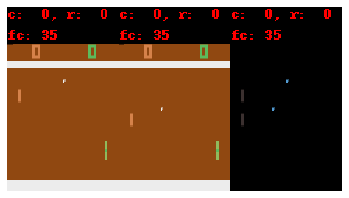

In [16]:
plt.imshow(obs[35])
plt.axis('off')
plt.savefig('img_dashboard.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [15]:
obs[35].shape

(132, 240, 3)